# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hm=pd.read_csv("/content/drive/MyDrive/MIT Program/Capstone Project/Data/hmeq.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [5]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [7]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights: Column DEBTINC does not contain data for persons that the loan is approved, also, the raw number three looks like a duplicate value**

### **Check the data types of the columns**

In [8]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights: The info methods indicates that there is not missing values but in the head and tail methods we saw them.**

### **Check for missing values**

In [9]:
# Analyse missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column.
data.isnull().sum()/data.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights: The DEBTINC column contains more than 20% of missing values, the prevous idea is that this column does not contain information for people that have the loan, that means that 21% of people does not contain this information**

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider? Fill the values of the columns that have less than 10% of missing values.
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? Considere this columns that have more than 10% of missing values but validate if the model tolerated this quantity of noise.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype('category')

In [14]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [15]:
# Analyze the summary statistics for numerical variables
data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Insights ______________**

In [16]:
# Check summary for categorical data
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights _____________**

**Let's look at the unique values in all the categorical variables**

In [17]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].unique())
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [0, 1]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
****************************************


**Insights _____________**

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure?
- If not, what else can be used? Try implementing that.

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

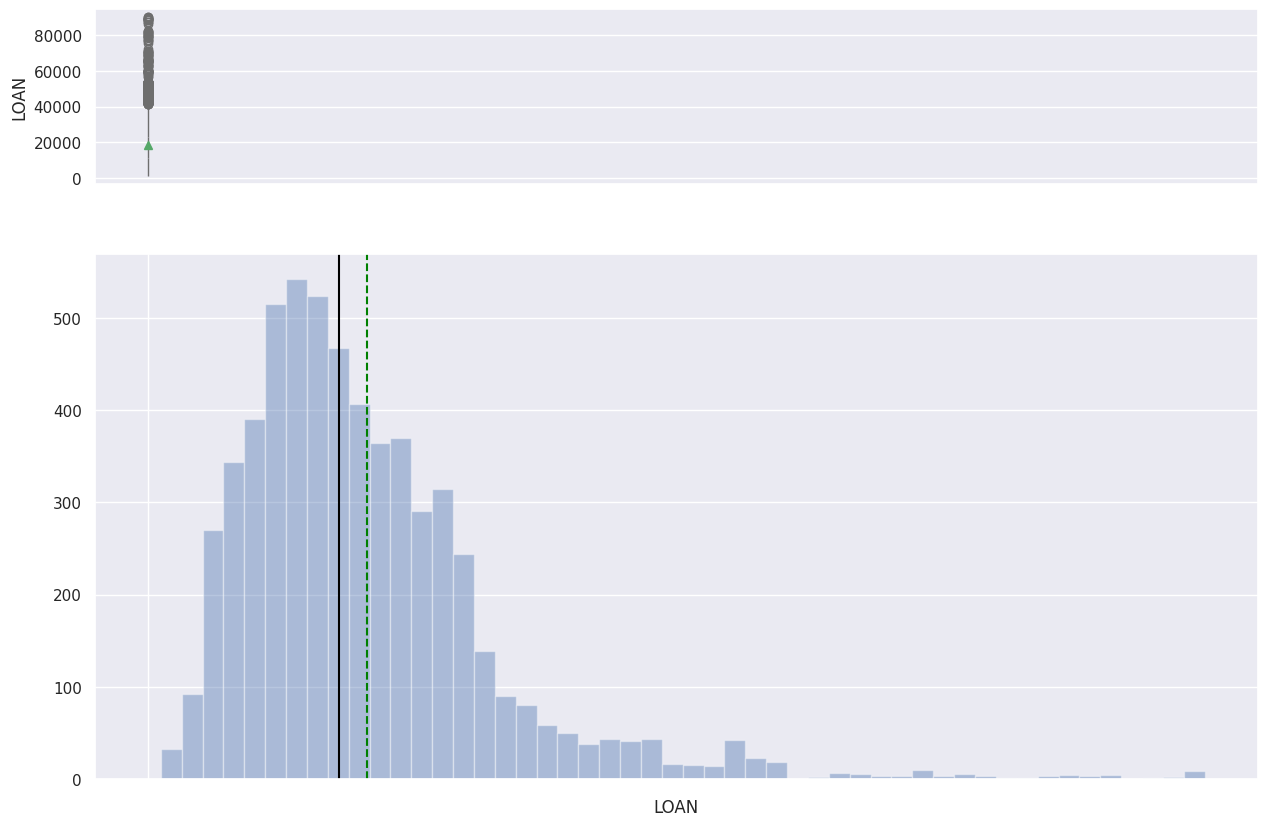

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [20]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

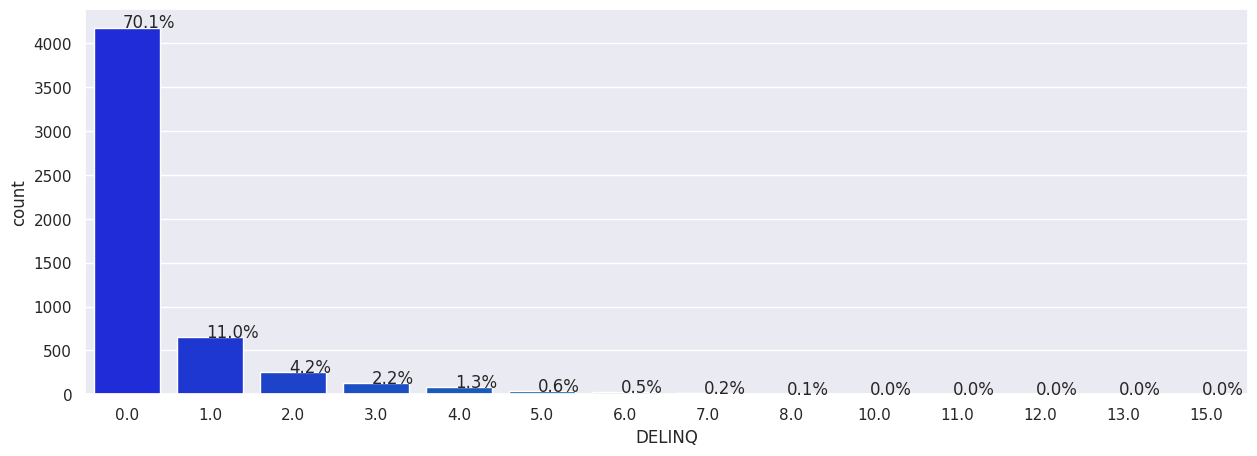

In [21]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights ________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

**Insights _____________**

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

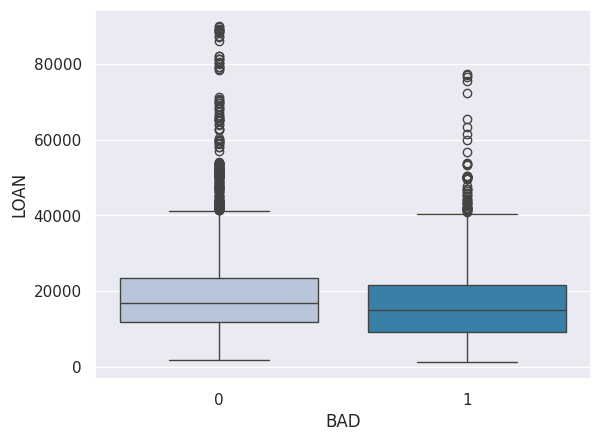

In [22]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

**Insights ______**

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

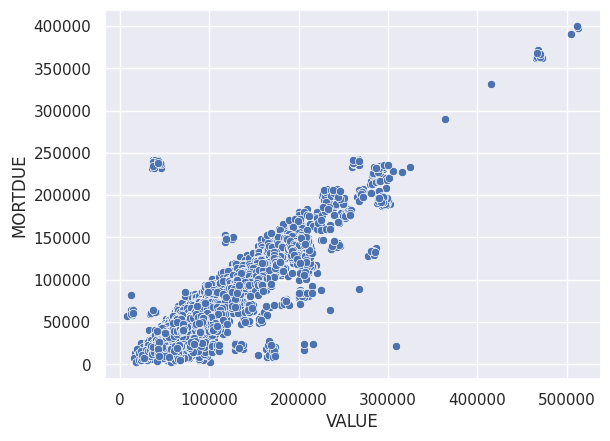

In [23]:
sns.scatterplot(data=data, x="VALUE", y="MORTDUE", palette="PuBu")

**Insights: _____**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [24]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


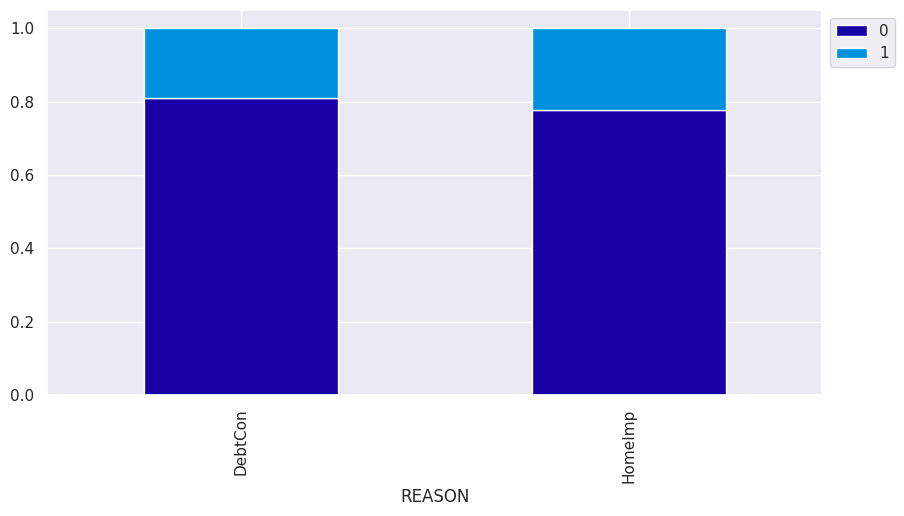

In [25]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

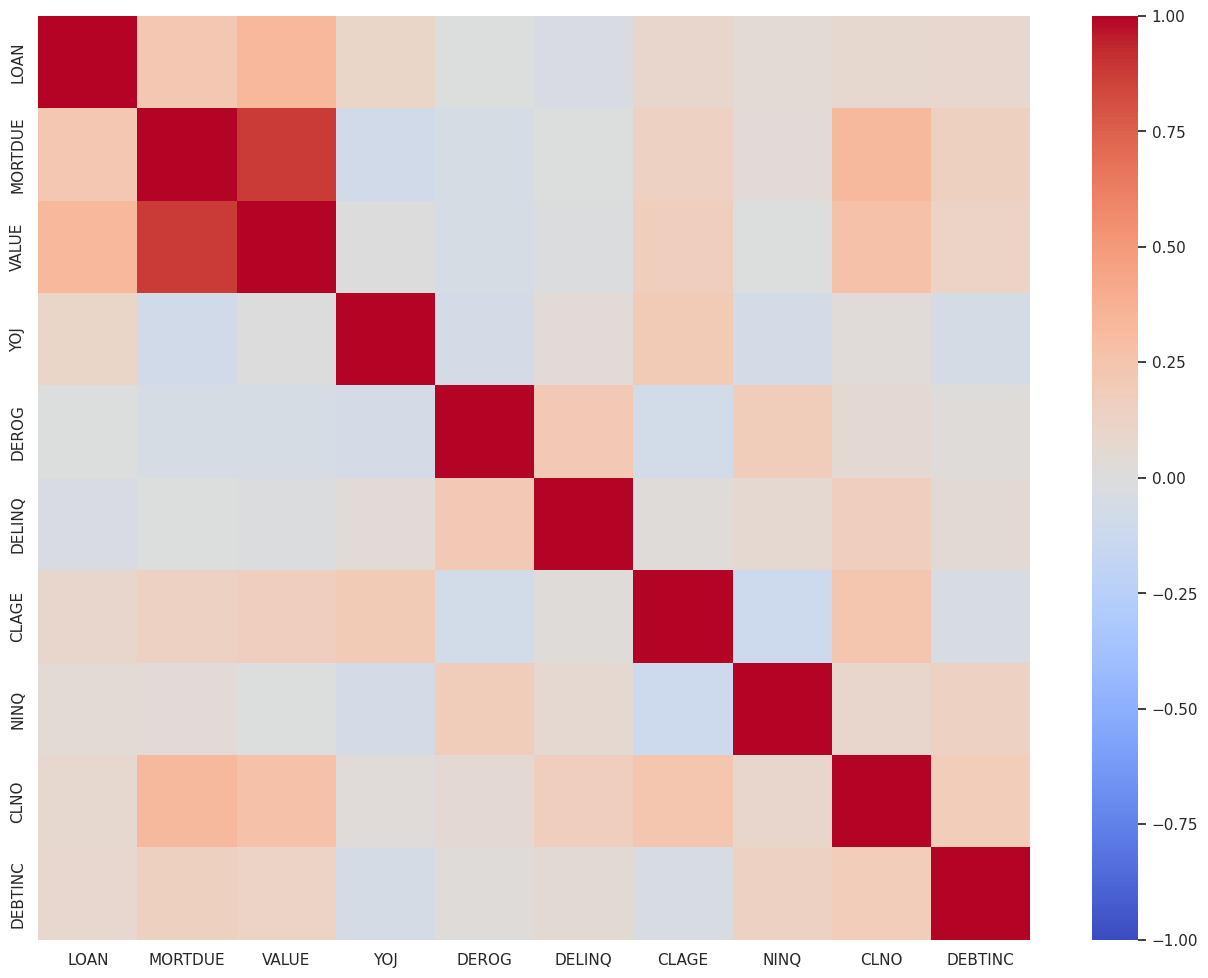

In [26]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

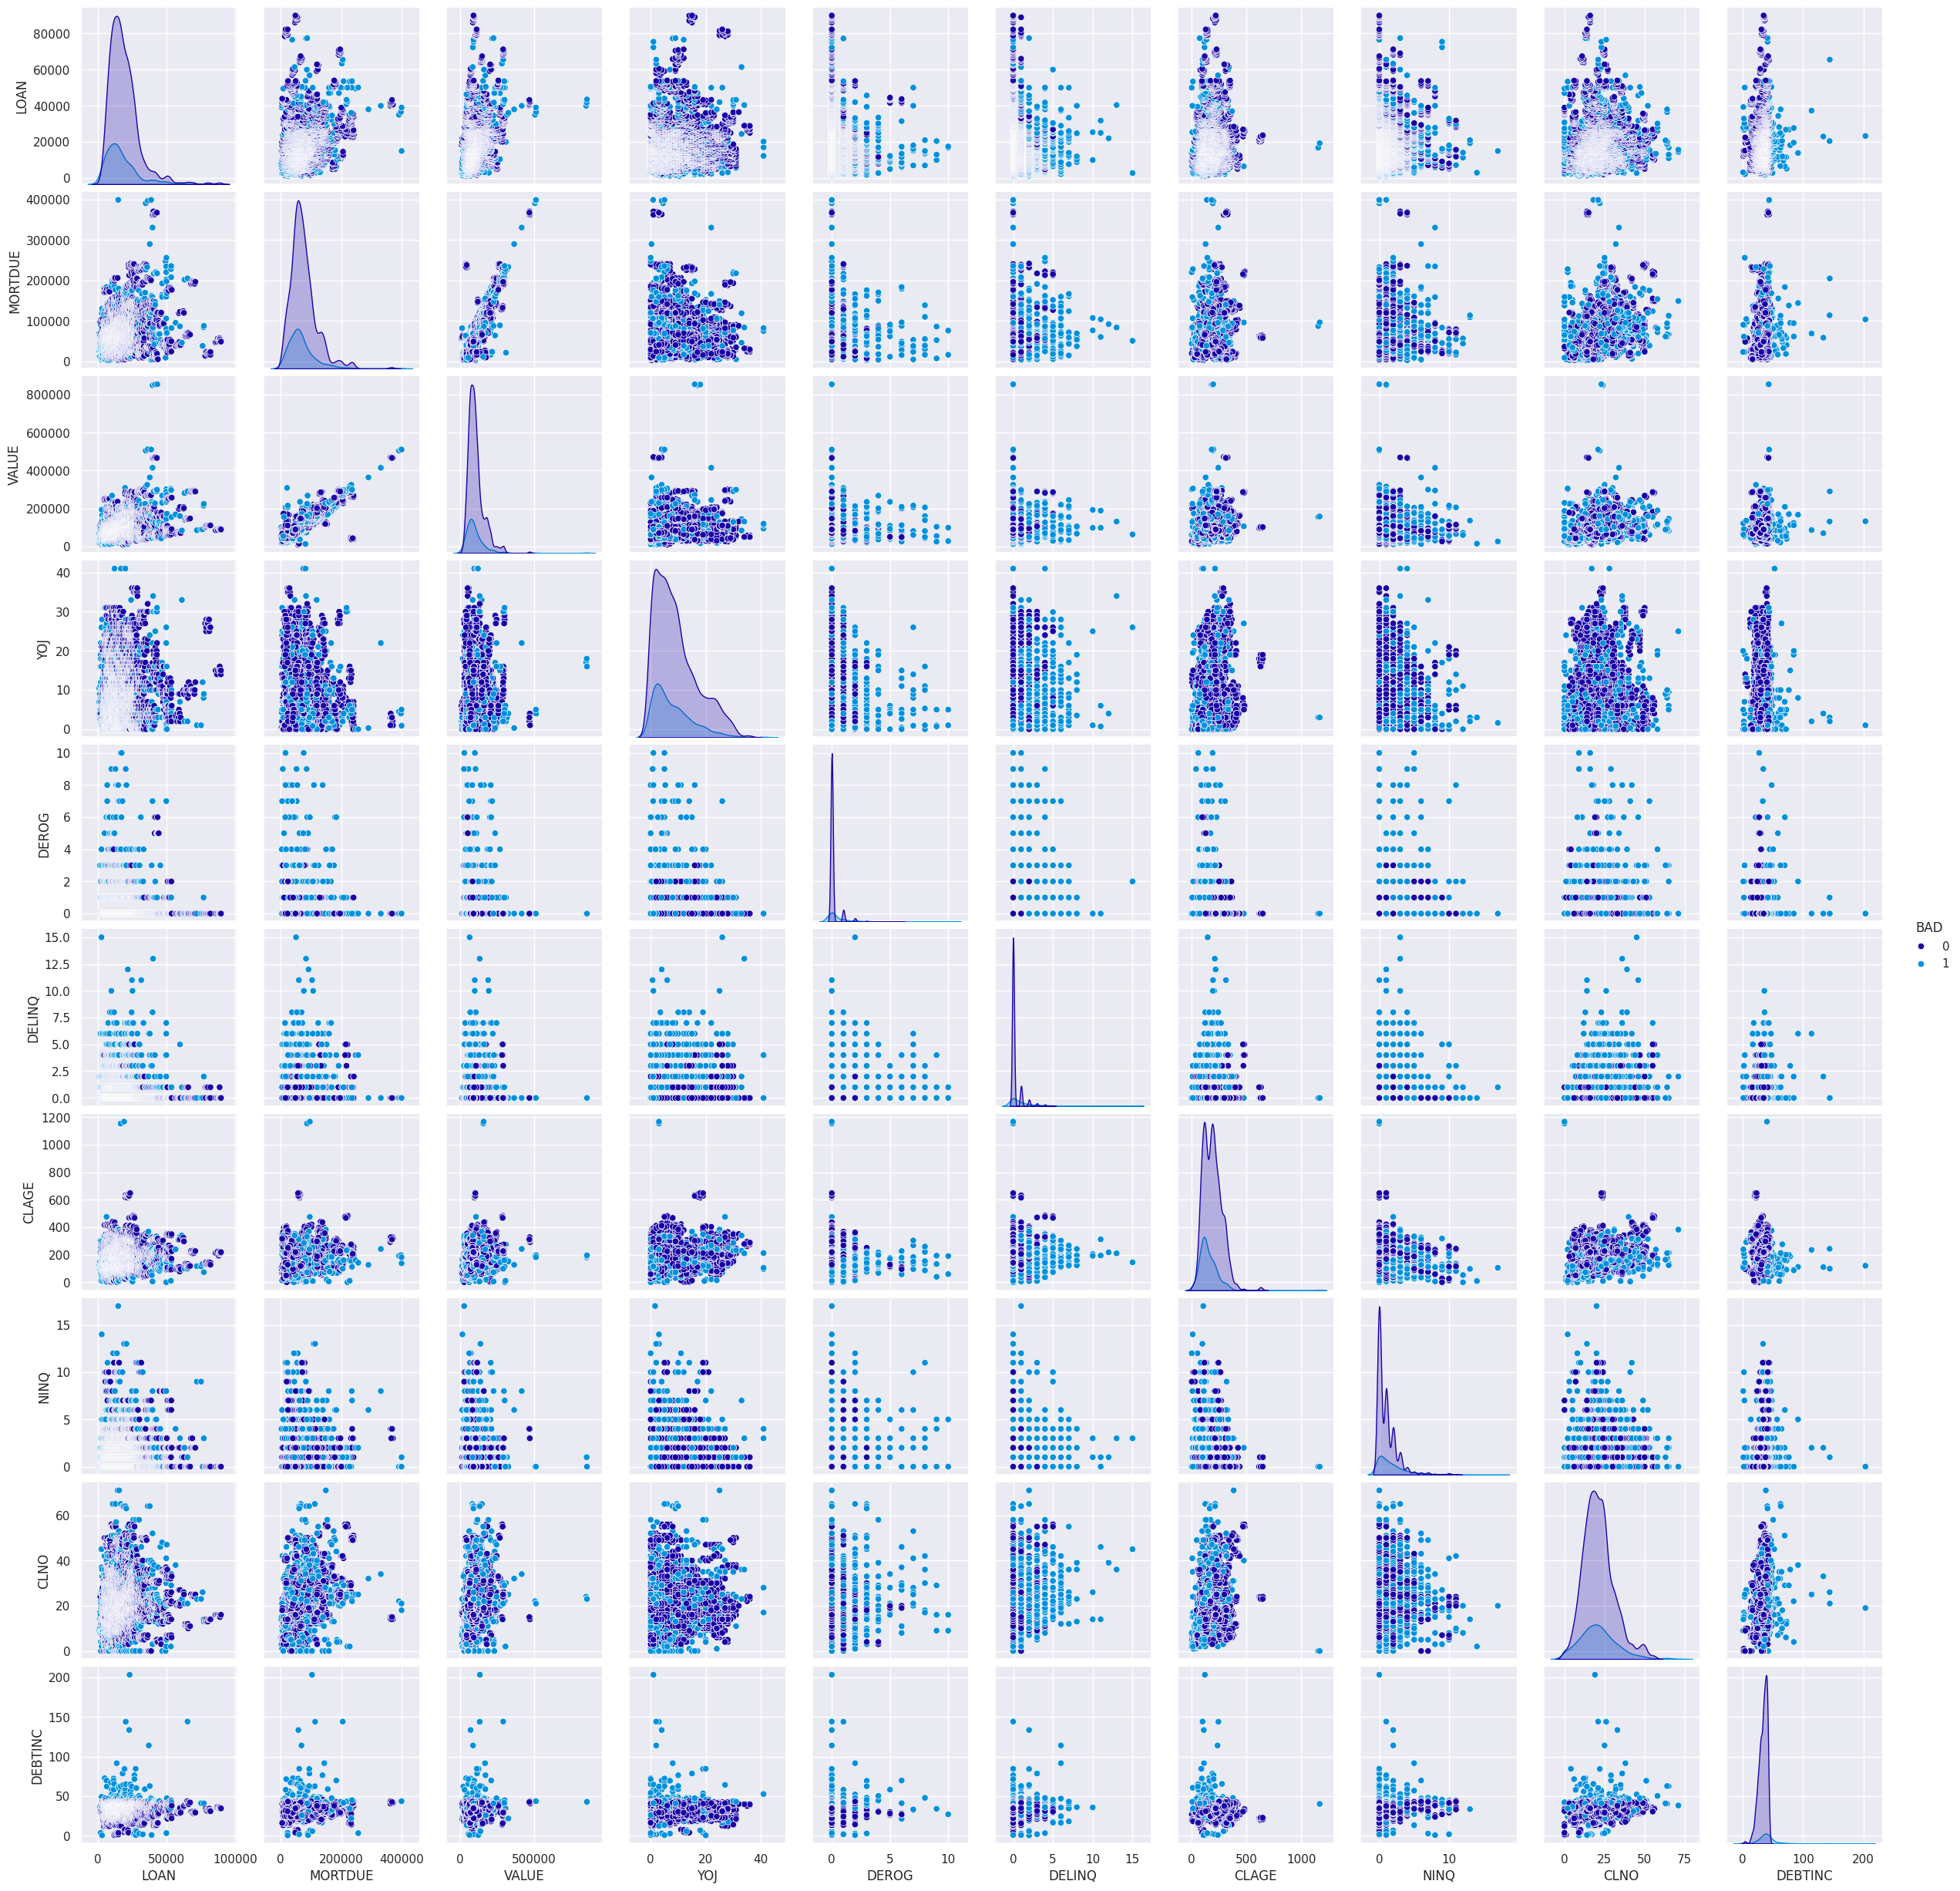

In [27]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data,hue='BAD')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them?
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [28]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1= df[col].quantile(0.25) # 25th quantile
    Q3= df[col].quantile(0.75) # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - (1.5*IQR)  #define lower whisker
    Upper_Whisker = Q3 + (1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df


In [29]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [30]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [31]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


In [32]:
df = df[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]

#### Filling missing values in numerical columns with median and mode in categorical variables

In [33]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.median()

# Fill object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].mode()

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [34]:
#@title
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop('BAD',axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)

y = data['BAD']

### **Splitting the data into 70% train and 30% test set**

In [35]:
#@title
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### **Think about it**
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [36]:
#@title
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model**

In [37]:
#@title
# Defining the Logistic regression model
lrm = LogisticRegression()

# Fitting the model on the training data
lrm.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

In [38]:
#@title
#Predict for train set
lrm.predict(X_train)

#checking the performance on the train dataset
lrm.score(X_train, y_train)

0.8041706615532119

#### Checking the performance on the test dataset

In [39]:
#@title
#Predict for test set
lrm.predict(X_test)

#checking the performance on the test dataset
lrm.score(X_test, y_test)

0.7919463087248322

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.00      0.00      0.00       372

    accuracy                           0.79      1788
   macro avg       0.40      0.50      0.44      1788
weighted avg       0.63      0.79      0.70      1788



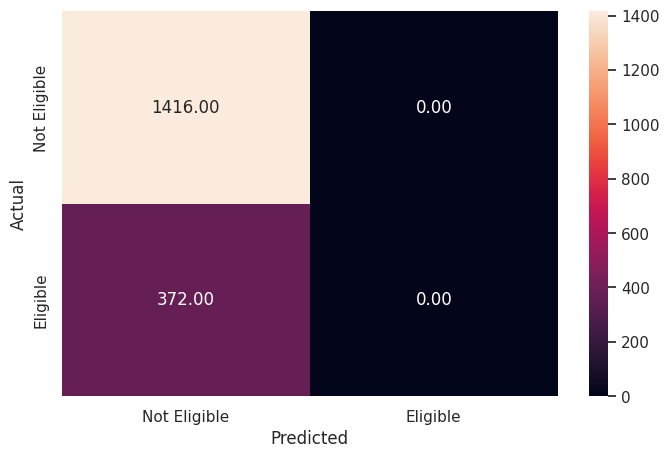

In [40]:
metrics_score(y_test,lrm.predict(X_test))

**Observations: __________**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [41]:
#@title
# Printing the coefficients of logistic regression
lrm.coef_

array([[-1.84847060e-06, -7.37335642e-06, -1.01195827e-05,
        -7.93821729e-10,  0.00000000e+00,  0.00000000e+00,
        -1.96716585e-08, -1.13403104e-10, -2.26806208e-09,
        -3.94849897e-09,  4.39645909e-13,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.39645909e-13,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

**Insights ________**

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [42]:
#@title
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


In [43]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#@title
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
raw_data = data.copy()
num_data = raw_data.select_dtypes('number')

# Select string and object columns.
cat_data = raw_data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')
# Fill numeric columns with median.
#raw_data[num_data.columns] = num_data.median()
raw_data[num_data.columns] = raw_data[num_data.columns].fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = raw_data[column].mode()[0]
    raw_data[column] = raw_data[column].fillna(raw_data[column].mode())

In [45]:
raw_data = raw_data[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]

#### Separating the target variable y and independent variable x

In [46]:
#@title
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = raw_data.drop('BAD',axis=1)

# Create dummy variables for the categorical variables
X = pd.get_dummies(X)

# Create y(dependent varibale)

y = raw_data['BAD']

#### Split the data

In [47]:
#@title
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [48]:
X_test.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

In [49]:
#@title
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dtc = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [50]:
#@title
#fitting Decision tree model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

In [51]:
#@title
# Checking performance on the training data
dtc.score(X_train,y_train)

1.0

#### Checking the performance on the test dataset

In [52]:
#@title
# Checking performance on the testing data
dtc.score(X_test,y_test)

0.8515100671140939

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       944
           1       0.67      0.57      0.61       248

    accuracy                           0.85      1192
   macro avg       0.78      0.75      0.76      1192
weighted avg       0.84      0.85      0.85      1192



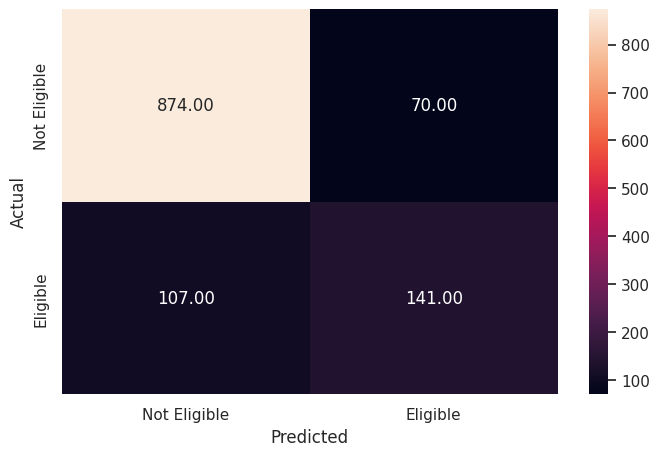

In [53]:
metrics_score(y_test,dtc.predict(X_test))

**Insights _____________**

### **Think about it:**
- Can we improve this model?
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [54]:
#@title
# Choose the type of classifier.
dtccv = DecisionTreeClassifier()


# Grid of parameters to choose from
parameters = {'max_depth': [1,2,3,4,5],
              'min_samples_leaf': [1,2,3,4,5],
              'criterion': ['gini', 'entropy']}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)


# Run the grid search
grid_obj = GridSearchCV(dtccv, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)


# Fit the GridSearch on train dataset
dtccv = grid_obj.best_estimator_
dtccv.fit(X_train, y_train)


# Set the clf to the best combination of parameters
dtccv = grid_obj.best_estimator_


# Fit the best algorithm to the data.
dtccv.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

#### Checking the performance on the train dataset

In [55]:
#@title
# Checking performance on the training data based on the tuned model
dtccv.score(X_train,y_train)

0.8947147651006712

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       944
           1       0.77      0.66      0.71       248

    accuracy                           0.89      1192
   macro avg       0.84      0.80      0.82      1192
weighted avg       0.88      0.89      0.88      1192



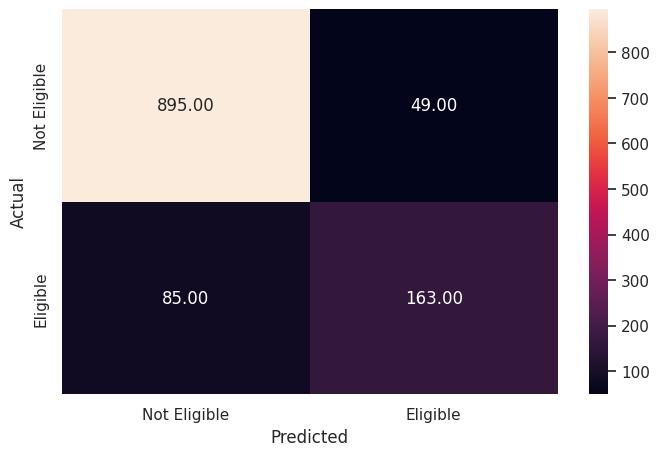

In [56]:
metrics_score(y_test,dtccv.predict(X_test))

#### Checking the performance on the test dataset

In [57]:
#@title
# Checking performance on the testing data based on the tuned model
dtccv.score(X_test,y_test)

0.8875838926174496

**Insights ___________**

#### Plotting the Decision Tree

[Text(0.483974358974359, 0.9166666666666666, 'x[5] <= 0.5\ngini = 0.317\nsamples = 4768\nvalue = [3827, 941]'),
 Text(0.27564102564102566, 0.75, 'x[9] <= 44.671\ngini = 0.234\nsamples = 3793\nvalue = [3281, 512]'),
 Text(0.14102564102564102, 0.5833333333333334, 'x[9] <= 34.818\ngini = 0.217\nsamples = 3739\nvalue = [3277, 462]'),
 Text(0.05128205128205128, 0.4166666666666667, 'x[2] <= 21771.5\ngini = 0.071\nsamples = 1601\nvalue = [1542, 59]'),
 Text(0.02564102564102564, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.07692307692307693, 0.25, 'x[2] <= 299940.5\ngini = 0.068\nsamples = 1598\nvalue = [1542, 56]'),
 Text(0.05128205128205128, 0.08333333333333333, 'gini = 0.065\nsamples = 1596\nvalue = [1542, 54]'),
 Text(0.10256410256410256, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[9] <= 34.818\ngini = 0.306\nsamples = 2138\nvalue = [1735, 403]'),
 Text(0.1794871794871795, 0.25, 'x[6] <= 178.101\ngini = 0.5

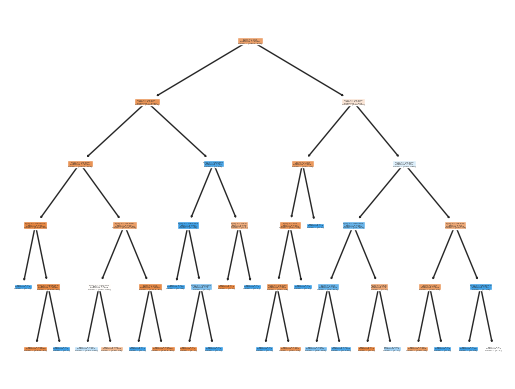

In [58]:
#@title
# Plot the decision  tree and analyze it to build the decision rule
tree.plot_tree(dtccv,filled=True)

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [59]:
#@title
# Defining Random forest CLassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

In [60]:
#@title
#Checking performance on the training data
rfc.score(X_train,y_train)

1.0

#### Checking the performance on the test dataset

In [61]:
#@title
# Checking performance on the test data
rfc.score(X_test,y_test)

0.9253355704697986

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       944
           1       0.91      0.71      0.80       248

    accuracy                           0.93      1192
   macro avg       0.92      0.85      0.88      1192
weighted avg       0.92      0.93      0.92      1192



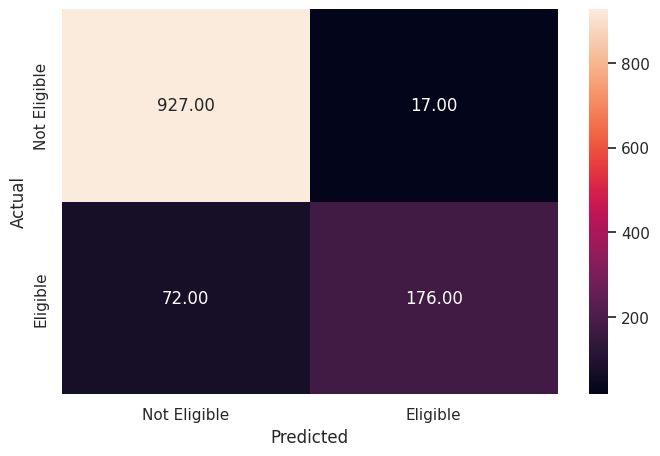

In [62]:
metrics_score(y_test,rfc.predict(X_test))

**Observations: __________**

### **Build a Random Forest model with Class Weights**

In [63]:
#@title
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rfc = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

# Fitting Random Forest model
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

In [64]:
#@title
# Checking performance on the train data
rfc.score(X_train,y_train)

1.0

#### Checking the performance on the test dataset

In [65]:
#@title
# Checking performance on the test data
rfc.score(X_test,y_test)

0.9203020134228188

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes?

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune.

In [66]:
#@title
# Choose the type of classifier.
rfccv = RandomForestClassifier()


# Grid of parameters to choose from
parameters = {"n_estimators": [20, 50, 100],
              'min_samples_split': [1,2,3,4,5],
              'min_samples_leaf': [1,2,3,4,5],
              'criterion': ['gini', 'entropy'],
              "max_features": ['auto', 'sqrt', 'log2', 'None']}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)


# Run the grid search
grid_obj = GridSearchCV(rfccv, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)


#fit the GridSearch on train dataset
rfccv = grid_obj.best_estimator_
rfccv.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rfccv = grid_obj.best_estimator_


# Fit the best algorithm to the data.
rfccv.fit(X_train, y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

In [67]:
#@title
# Checking performance on the training data
rfccv.score(X_train,y_train)

1.0

#### Checking the performance on the test dataset

In [68]:
#@title
# Checking performace on test dataset
rfccv.score(X_test,y_test)

0.9236577181208053

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       944
           1       0.92      0.69      0.79       248

    accuracy                           0.92      1192
   macro avg       0.92      0.84      0.87      1192
weighted avg       0.92      0.92      0.92      1192



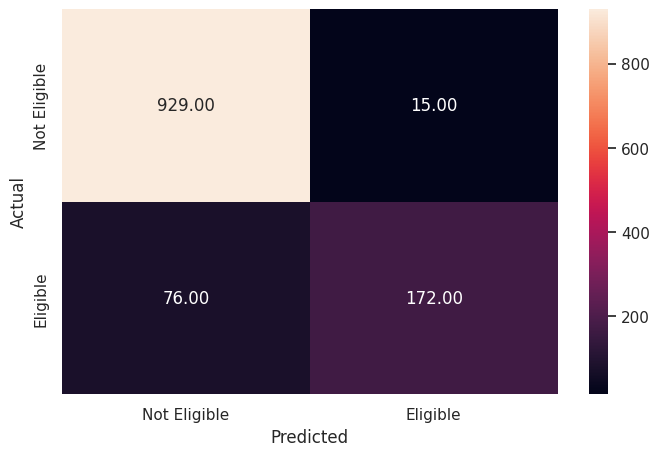

In [69]:
metrics_score(y_test,rfccv.predict(X_test))

**Insights: _____**

#### Plot the Feature importance of the tuned Random Forest

In [70]:
#@title
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
feature_imp = pd.Series(rfccv.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

DEBTINC           0.226835
CLAGE             0.101768
DELINQ            0.101500
LOAN              0.092149
VALUE             0.089484
MORTDUE           0.079391
CLNO              0.077709
YOJ               0.060419
DEROG             0.054719
NINQ              0.046602
JOB_Other         0.012732
REASON_DebtCon    0.010198
REASON_HomeImp    0.009615
JOB_ProfExe       0.009472
JOB_Office        0.009432
JOB_Mgr           0.008056
JOB_Sales         0.005655
JOB_Self          0.004262
dtype: float64

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement?

### **Comparing Model Performances**

In [71]:
#@title
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [72]:
#@title
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [73]:
#@title
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [76]:
#@title
# Make the list of all the model names
#lrm  - delete the flags - those columns does not work. and retrain the model.
models = [lrm, dtc, dtccv, rfc, rfccv]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [77]:
#@title
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':["LRC", "DTC", "DTCT", "RFC", "RFCT"],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LRC,0.802643,0.791946,0.000000,0.000000,0.00000,0.000000
1,DTC,1.000000,0.851510,1.000000,0.568548,1.00000,0.668246
2,DTCT,0.894715,0.887584,0.710946,0.657258,0.74416,0.768868
3,RFC,1.000000,0.920302,1.000000,0.677419,1.00000,0.918033
4,RFCT,1.000000,0.923658,1.000000,0.693548,1.00000,0.919786


**Insights: ________**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?